Ajuste Polinomial de Curvas
============================

Esse tutorial visa explicar os conceitos de *overfitting* e regulzarização. *Overfitting* ocorre quando
o modelo decora os dados de entrada, de forma que o modelo se torne incapaz de generalizar para novos
dados. Regulzarização é uma técnica para evitar o overfitting.


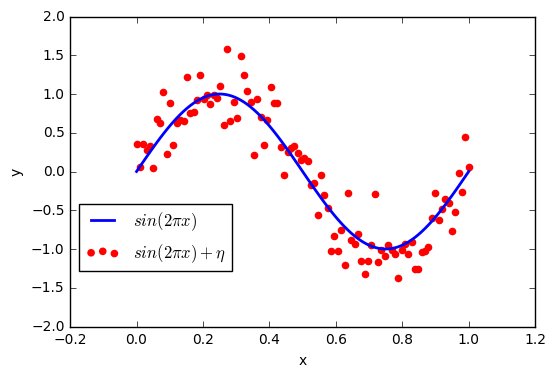

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import *

sample_size = 100
x = np.linspace(0,1,sample_size)
y = np.sin(2*np.pi*x)
noise = np.random.normal(0,0.3,sample_size)
yn = y + noise


plt.figure()
plt.plot(x,y,linewidth = 2.0,label = r'$sin(2 \pi x)$')
plt.scatter(x,yn,color='red',label = r'$sin(2 \pi x) + \eta$')
plt.legend(loc = (0.02, 0.18))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Dados 
=========

Observações: $$\boldsymbol{x} =(x_1,x_2,...,x_N)^T$$
Alvo:  $$\boldsymbol{t} =(t_1,t_2,...,t_N)^T$$


Modelo
=========
$$y(x,\boldsymbol{w})= w_0 + w_1x +w_2x^2+...+w_mx^m = \sum^M_{j=0}w_jx^j$$

Função de custo 
===============

$$E(\boldsymbol{w})=\frac{1}{2}\sum_{n=1}^N\{y(x_n,\boldsymbol{w})-t_n\}^2$$

Nós queremos encontrar os pesos **w** que minimizam o erro **E(w)**.

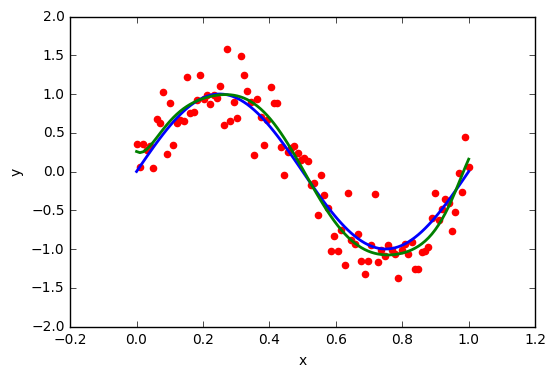

In [15]:
def plotmodel(M):
    coefs = np.polynomial.polynomial.polyfit(x, yn, M)[::-1]
    p = np.poly1d(coefs)
    plt.figure()
    plt.plot(x,y,linewidth = 2.0)
    plt.scatter(x,yn,color='red')
    plt.xlabel("x")
    plt.ylabel(r'y')
    y_fit = p(x) 
    plt.plot(x,y_fit,linewidth = 2.0)
    
interact(plotmodel,M=(0,9,1))  

Função de custo com regularização 
====================================

$$E(\boldsymbol{w})=\frac{1}{2}\sum_{n=1}^N\{y(x_n,\boldsymbol{w})-t_n\}^2 +\frac{\lambda}{2}||\boldsymbol{W}||$$